In [1]:
import numpy as np
import pandas as pd
import string
from pandas.api.types import is_numeric_dtype

In [2]:
df = pd.read_csv('Manhattan12.csv', encoding = "ISO-8859-1")

In [3]:
df.shape

(27399, 21)

In [4]:
df.head()

,ï»¿Manhattan Rolling Sales File. All Sales From August 2012 - August 2013.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 08/30/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Neighborhood Name 09/06/13, Descriptive Data i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013


In [5]:
df = df.drop(range(3))
df.head()

,ï»¿Manhattan Rolling Sales File. All Sales From August 2012 - August 2013.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013


In [6]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [7]:
df.head()

3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
8,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


In [8]:
df.columns = [x.replace("\n", " ") for x in df.columns.to_list()]

In [9]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
8,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2170,400,,V1,44 FAIRVIEW AVENUE,,...,0,0,0,"16,217",0,0,4,V1,$0,29/04/2013
27395,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,,V1,BENNETT AVENUE,,...,0,0,0,"4,150",0,0,4,V1,"$495,000",26/06/2013
27396,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,,V1,BENNETT AVENUE,,...,0,0,0,"4,150",0,0,4,V1,$0,02/04/2013
27397,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,76,,V1,N/A MAGAW PLACE,,...,0,0,0,760,0,0,4,V1,$0,26/06/2013


In [10]:
df.dtypes

BOROUGH                           object
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                             object
LOT                               object
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APART MENT NUMBER                 object
ZIP CODE                          object
RESIDENTIAL UNITS                 object
COMMERCIAL UNITS                  object
TOTAL UNITS                       object
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                        object
TAX CLASS AT TIME OF SALE         object
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [11]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
8,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2170,400,,V1,44 FAIRVIEW AVENUE,,...,0,0,0,"16,217",0,0,4,V1,$0,29/04/2013
27395,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,,V1,BENNETT AVENUE,,...,0,0,0,"4,150",0,0,4,V1,"$495,000",26/06/2013
27396,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,,V1,BENNETT AVENUE,,...,0,0,0,"4,150",0,0,4,V1,$0,02/04/2013
27397,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,76,,V1,N/A MAGAW PLACE,,...,0,0,0,760,0,0,4,V1,$0,26/06/2013


In [12]:
df_categorical = df[['NEIGHBORHOOD','BUILDING CLASS CATEGORY', "TAX CLASS AT PRESENT", "BUILDING CLASS AT PRESENT", "ADDRESS", "APART MENT NUMBER", "BUILDING CLASS AT TIME OF SALE", "SALE DATE", "EASE-MENT"]]

In [13]:
df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,BUILDING CLASS AT TIME OF SALE,SALE DATE,EASE-MENT
4,,13 CONDOS - ELEVATOR APARTMENTS,,,345 WEST 14TH STREET,,R4,20/05/2013,
5,,13 CONDOS - ELEVATOR APARTMENTS,,,345 WEST 14TH STREET,,R4,16/05/2013,
6,,13 CONDOS - ELEVATOR APARTMENTS,,,345 WEST 14TH STREET,,R4,23/05/2013,
7,,13 CONDOS - ELEVATOR APARTMENTS,,,345 WEST 14TH STREET,,R4,15/05/2013,
8,,13 CONDOS - ELEVATOR APARTMENTS,,,345 WEST 14TH STREET,,R4,13/05/2013,
...,...,...,...,...,...,...,...,...,...
27394,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,V1,44 FAIRVIEW AVENUE,,V1,29/04/2013,
27395,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,V1,BENNETT AVENUE,,V1,26/06/2013,
27396,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,V1,BENNETT AVENUE,,V1,02/04/2013,
27397,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,V1,N/A MAGAW PLACE,,V1,26/06/2013,


In [14]:
df_numerical = df[['BOROUGH','BLOCK', "LOT", "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", "SALE PRICE"]]


In [15]:
df_numerical

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
4,1,738,1306,10014,0,0,0,0,0,0,2,"$2,214,693"
5,1,738,1307,10014,0,0,0,0,0,0,2,"$1,654,656"
6,1,738,1308,10014,0,0,0,0,0,0,2,"$1,069,162"
7,1,738,1309,10014,0,0,0,0,0,0,2,"$1,374,637"
8,1,738,1310,10014,0,0,0,0,0,0,2,"$1,649,565"
...,...,...,...,...,...,...,...,...,...,...,...,...
27394,1,2170,400,10040,0,0,0,"16,217",0,0,4,$0
27395,1,2180,75,10033,0,0,0,"4,150",0,0,4,"$495,000"
27396,1,2180,75,10033,0,0,0,"4,150",0,0,4,$0
27397,1,2180,76,10033,0,0,0,760,0,0,4,$0


In [16]:
df_numerical = df_numerical.replace(',','', regex=True)

In [17]:
df_numerical["SALE PRICE"] = df_numerical["SALE PRICE"].replace({'\$':''}, regex = True)

In [18]:
df_numerical = df_numerical.apply(pd.to_numeric, errors='coerce', axis=1)

In [19]:
df_numerical

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
4,1,738,1306,10014,0,0,0,0,0,0,2,2214693
5,1,738,1307,10014,0,0,0,0,0,0,2,1654656
6,1,738,1308,10014,0,0,0,0,0,0,2,1069162
7,1,738,1309,10014,0,0,0,0,0,0,2,1374637
8,1,738,1310,10014,0,0,0,0,0,0,2,1649565
...,...,...,...,...,...,...,...,...,...,...,...,...
27394,1,2170,400,10040,0,0,0,16217,0,0,4,0
27395,1,2180,75,10033,0,0,0,4150,0,0,4,495000
27396,1,2180,75,10033,0,0,0,4150,0,0,4,0
27397,1,2180,76,10033,0,0,0,760,0,0,4,0


In [20]:
df_numerical.dtypes

BOROUGH                      int64
BLOCK                        int64
LOT                          int64
ZIP CODE                     int64
RESIDENTIAL UNITS            int64
COMMERCIAL UNITS             int64
TOTAL UNITS                  int64
LAND SQUARE FEET             int64
GROSS SQUARE FEET            int64
YEAR BUILT                   int64
TAX CLASS AT TIME OF SALE    int64
SALE PRICE                   int64
dtype: object

In [21]:
is_numeric_dtype(df_numerical['BOROUGH'])

True

In [22]:
df_categorical["SALE DATE"] = pd.to_datetime(df_categorical["SALE DATE"])

/var/folders/fb/dpj1jnpj4zsghzf4z1391q_80000gn/T/ipykernel_4856/540480618.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_categorical["SALE DATE"] = pd.to_datetime(df_categorical["SALE DATE"])
/var/folders/fb/dpj1jnpj4zsghzf4z1391q_80000gn/T/ipykernel_4856/540480618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical["SALE DATE"] = pd.to_datetime(df_categorical["SALE DATE"])


In [23]:
df_categorical.dtypes

NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APART MENT NUMBER                         object
BUILDING CLASS AT TIME OF SALE            object
SALE DATE                         datetime64[ns]
EASE-MENT                                 object
dtype: object

In [24]:
df_categorical = df_categorical.replace(' ','', regex=True)

In [25]:
df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,BUILDING CLASS AT TIME OF SALE,SALE DATE,EASE-MENT
4,,13CONDOS-ELEVATORAPARTMENTS,,,345WEST14THSTREET,,R4,2013-05-20,
5,,13CONDOS-ELEVATORAPARTMENTS,,,345WEST14THSTREET,,R4,2013-05-16,
6,,13CONDOS-ELEVATORAPARTMENTS,,,345WEST14THSTREET,,R4,2013-05-23,
7,,13CONDOS-ELEVATORAPARTMENTS,,,345WEST14THSTREET,,R4,2013-05-15,
8,,13CONDOS-ELEVATORAPARTMENTS,,,345WEST14THSTREET,,R4,2013-05-13,
...,...,...,...,...,...,...,...,...,...
27394,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,44FAIRVIEWAVENUE,,V1,2013-04-29,
27395,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,,V1,2013-06-26,
27396,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,,V1,2013-02-04,
27397,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,N/AMAGAWPLACE,,V1,2013-06-26,


In [26]:
df_categorical.replace(r'^\s*$', np.nan, regex=True)

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,BUILDING CLASS AT TIME OF SALE,SALE DATE,EASE-MENT
4,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2013-05-20,NaN
5,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2013-05-16,NaN
6,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2013-05-23,NaN
7,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2013-05-15,NaN
8,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2013-05-13,NaN
...,...,...,...,...,...,...,...,...,...
27394,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,44FAIRVIEWAVENUE,NaN,V1,2013-04-29,NaN
27395,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,NaN,V1,2013-06-26,NaN
27396,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,NaN,V1,2013-02-04,NaN
27397,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,N/AMAGAWPLACE,NaN,V1,2013-06-26,NaN


In [27]:
df_numerical

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
4,1,738,1306,10014,0,0,0,0,0,0,2,2214693
5,1,738,1307,10014,0,0,0,0,0,0,2,1654656
6,1,738,1308,10014,0,0,0,0,0,0,2,1069162
7,1,738,1309,10014,0,0,0,0,0,0,2,1374637
8,1,738,1310,10014,0,0,0,0,0,0,2,1649565
...,...,...,...,...,...,...,...,...,...,...,...,...
27394,1,2170,400,10040,0,0,0,16217,0,0,4,0
27395,1,2180,75,10033,0,0,0,4150,0,0,4,495000
27396,1,2180,75,10033,0,0,0,4150,0,0,4,0
27397,1,2180,76,10033,0,0,0,760,0,0,4,0


In [28]:
df_numerical = df_numerical.replace(0, np.nan)

In [29]:
df_numerical

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
4,1,738,1306,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,2214693.0
5,1,738,1307,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1654656.0
6,1,738,1308,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1069162.0
7,1,738,1309,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1374637.0
8,1,738,1310,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1649565.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27394,1,2170,400,10040.0,NaN,NaN,NaN,16217.0,NaN,NaN,4,NaN
27395,1,2180,75,10033.0,NaN,NaN,NaN,4150.0,NaN,NaN,4,495000.0
27396,1,2180,75,10033.0,NaN,NaN,NaN,4150.0,NaN,NaN,4,NaN
27397,1,2180,76,10033.0,NaN,NaN,NaN,760.0,NaN,NaN,4,NaN


In [30]:
df_numerical.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,27395.0,27395.000000,27395.000000,27394.000000,11023.000000,3433.000000,17691.000000,4489.000000,4.326000e+03,20954.000000,27395.000000,1.980200e+04
mean,1.0,1109.666728,741.789086,10029.226217,4.390003,2.992426,3.545249,5893.466028,6.061620e+04,1953.080557,2.488118,2.556609e+06
std,0.0,465.994469,819.422424,34.966983,23.260831,12.689861,19.482767,7884.729624,8.111694e+04,37.692641,0.891723,1.916295e+07
min,1.0,7.000000,1.000000,10001.000000,1.000000,1.000000,1.000000,200.000000,2.530000e+02,1000.000000,1.000000,1.000000e+00
25%,1.0,877.000000,37.000000,10016.000000,1.000000,1.000000,1.000000,2104.000000,6.198500e+03,1920.000000,2.000000,3.676662e+05
50%,1.0,1047.000000,1007.000000,10019.000000,1.000000,2.000000,1.000000,5046.000000,2.337150e+04,1955.000000,2.000000,7.400000e+05
75%,1.0,1411.000000,1233.000000,10027.000000,1.000000,2.000000,1.000000,7532.000000,1.128500e+05,1987.000000,4.000000,1.627399e+06
max,1.0,2250.000000,9117.000000,10463.000000,1328.000000,604.000000,1349.000000,213650.000000,1.970736e+06,2013.000000,4.000000,1.307965e+09


In [31]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27395 entries, 4 to 27398
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BOROUGH                    27395 non-null  int64  
 1   BLOCK                      27395 non-null  int64  
 2   LOT                        27395 non-null  int64  
 3   ZIP CODE                   27394 non-null  float64
 4   RESIDENTIAL UNITS          11023 non-null  float64
 5   COMMERCIAL UNITS           3433 non-null   float64
 6   TOTAL UNITS                17691 non-null  float64
 7   LAND SQUARE FEET           4489 non-null   float64
 8   GROSS SQUARE FEET          4326 non-null   float64
 9   YEAR BUILT                 20954 non-null  float64
 10  TAX CLASS AT TIME OF SALE  27395 non-null  int64  
 11  SALE PRICE                 19802 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 2.5 MB


In [32]:
df_numerical.value_counts()

BOROUGH  BLOCK  LOT  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  SALE PRICE
1        1409   21   10021.0   34.0               1.0               35.0         7026.0            71189.0            1923.0      2                          2396875.0     3
         1666   8    10029.0   3.0                1.0               4.0          2018.0            3873.0             1910.0      2                          10.0          3
         485    5    10012.0   4.0                1.0               5.0          2258.0            9738.0             1900.0      4                          550000.0      2
         1375   129  10022.0   17.0               4.0               21.0         4016.0            17296.0            1910.0      2                          28679710.0    2
         1409   21   10021.0   34.0               1.0               35.0         7026.0            71189.0            1923.0      2         

In [33]:
df_numerical.corr()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLOCK,NaN,1.000000,-0.190051,0.174566,0.075659,-0.021113,0.068880,-0.035151,-0.170336,-0.077556,-0.115519,-0.020252
LOT,NaN,-0.190051,1.000000,0.259337,-0.165685,-0.057746,-0.150203,0.062439,-0.028596,0.304992,0.095990,-0.027090
ZIP CODE,NaN,0.174566,0.259337,1.000000,-0.011285,-0.027379,-0.002676,-0.044802,-0.113088,0.084003,-0.124982,-0.010574
RESIDENTIAL UNITS,NaN,0.075659,-0.165685,-0.011285,1.000000,0.335878,0.999283,0.859076,0.950292,-0.079680,0.028643,0.687956
COMMERCIAL UNITS,NaN,-0.021113,-0.057746,-0.027379,0.335878,1.000000,0.379958,0.180021,0.302926,-0.058579,0.046876,0.199065
TOTAL UNITS,NaN,0.068880,-0.150203,-0.002676,0.999283,0.379958,1.000000,0.493077,0.426153,-0.091489,-0.055140,0.261624
LAND SQUARE FEET,NaN,-0.035151,0.062439,-0.044802,0.859076,0.180021,0.493077,1.000000,0.739576,0.246777,0.250873,0.382177
GROSS SQUARE FEET,NaN,-0.170336,-0.028596,-0.113088,0.950292,0.302926,0.426153,0.739576,1.000000,0.562680,0.489327,0.469032
YEAR BUILT,NaN,-0.077556,0.304992,0.084003,-0.079680,-0.058579,-0.091489,0.246777,0.562680,1.000000,0.293717,-0.028839


array([[<Axes: title={'center': 'BOROUGH'}>,
        <Axes: title={'center': 'BLOCK'}>,
        <Axes: title={'center': 'LOT'}>],
       [<Axes: title={'center': 'ZIP CODE'}>,
        <Axes: title={'center': 'RESIDENTIAL UNITS'}>,
        <Axes: title={'center': 'COMMERCIAL UNITS'}>],
       [<Axes: title={'center': 'TOTAL UNITS'}>,
        <Axes: title={'center': 'LAND SQUARE FEET'}>,
        <Axes: title={'center': 'GROSS SQUARE FEET'}>],
       [<Axes: title={'center': 'YEAR BUILT'}>,
        <Axes: title={'center': 'TAX CLASS AT TIME OF SALE'}>,
        <Axes: title={'center': 'SALE PRICE'}>]], dtype=object)

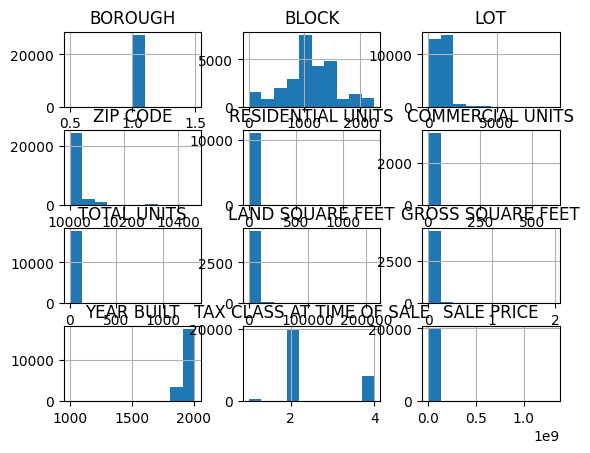

In [34]:
df_numerical.hist()

In [37]:
df_numerical = df_numerical.drop(["BOROUGH"], axis='columns')

In [38]:
df_categorical = df_categorical.drop(["APART MENT NUMBER", "EASE-MENT"], axis='columns')

In [39]:
df_numerical

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
4,738,1306,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,2214693.0
5,738,1307,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1654656.0
6,738,1308,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1069162.0
7,738,1309,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1374637.0
8,738,1310,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1649565.0
...,...,...,...,...,...,...,...,...,...,...,...
27394,2170,400,10040.0,NaN,NaN,NaN,16217.0,NaN,NaN,4,NaN
27395,2180,75,10033.0,NaN,NaN,NaN,4150.0,NaN,NaN,4,495000.0
27396,2180,75,10033.0,NaN,NaN,NaN,4150.0,NaN,NaN,4,NaN
27397,2180,76,10033.0,NaN,NaN,NaN,760.0,NaN,NaN,4,NaN


In [40]:
df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,BUILDING CLASS AT TIME OF SALE,SALE DATE
4,,13CONDOS-ELEVATORAPARTMENTS,,,345WEST14THSTREET,R4,2013-05-20
5,,13CONDOS-ELEVATORAPARTMENTS,,,345WEST14THSTREET,R4,2013-05-16
6,,13CONDOS-ELEVATORAPARTMENTS,,,345WEST14THSTREET,R4,2013-05-23
7,,13CONDOS-ELEVATORAPARTMENTS,,,345WEST14THSTREET,R4,2013-05-15
8,,13CONDOS-ELEVATORAPARTMENTS,,,345WEST14THSTREET,R4,2013-05-13
...,...,...,...,...,...,...,...
27394,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,44FAIRVIEWAVENUE,V1,2013-04-29
27395,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,2013-06-26
27396,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,2013-02-04
27397,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,N/AMAGAWPLACE,V1,2013-06-26
